In [54]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy.interpolate import griddata, CloughTocher2DInterpolator

matplotlib.interactive(True)

# Generate scalar points

In [55]:
SUBDIVISIONS = 3

In [56]:
scalars = [[1,0,0], [0,1,0], [0,0,1]]
scalars = np.array(scalars)
# add SUBSIDISIONS interpolations between all points
for i in range(SUBDIVISIONS):
    _scalars = []
    for point_1 in range(len(scalars)):
        for point_2 in range(point_1, len(scalars)):
            interpolation = (scalars[point_1] + scalars[point_2]) / 2
            _scalars.append(interpolation)
    scalars = _scalars
scalars

[array([1., 0., 0.]),
 array([0.875, 0.125, 0.   ]),
 array([0.875, 0.   , 0.125]),
 array([0.75, 0.25, 0.  ]),
 array([0.75 , 0.125, 0.125]),
 array([0.75, 0.  , 0.25]),
 array([0.75, 0.25, 0.  ]),
 array([0.75 , 0.125, 0.125]),
 array([0.625, 0.375, 0.   ]),
 array([0.625, 0.25 , 0.125]),
 array([0.625, 0.125, 0.25 ]),
 array([0.75, 0.  , 0.25]),
 array([0.625, 0.25 , 0.125]),
 array([0.625, 0.125, 0.25 ]),
 array([0.625, 0.   , 0.375]),
 array([0.5, 0.5, 0. ]),
 array([0.5  , 0.375, 0.125]),
 array([0.5 , 0.25, 0.25]),
 array([0.5 , 0.25, 0.25]),
 array([0.5  , 0.125, 0.375]),
 array([0.5, 0. , 0.5]),
 array([0.75, 0.25, 0.  ]),
 array([0.75 , 0.125, 0.125]),
 array([0.625, 0.375, 0.   ]),
 array([0.625, 0.25 , 0.125]),
 array([0.625, 0.125, 0.25 ]),
 array([0.625, 0.375, 0.   ]),
 array([0.625, 0.25 , 0.125]),
 array([0.5, 0.5, 0. ]),
 array([0.5  , 0.375, 0.125]),
 array([0.5 , 0.25, 0.25]),
 array([0.625, 0.125, 0.25 ]),
 array([0.5  , 0.375, 0.125]),
 array([0.5 , 0.25, 0.25]),


# Generate

plot points on triangle simplex

In [57]:
def plot_simplex(metric_values, interp_type='linear'):
    """Plots a simplex heatmap based on provided metric values.

    Args:
        metric_values: A list or numpy array of metric values corresponding to each point in the simplex.
                      The length must match the number of generated scalar points.
        interp_type: Type of interpolation to use. Can be 'linear', 'clough_tocher', or 'cubic'. Defaults to 'linear'.
    """
    if len(metric_values) != len(scalars):
        raise ValueError("Length of metric_values must match the number of scalar points.")

    if interp_type not in ['linear', 'clough_tocher', 'cubic']:
        raise ValueError("Invalid interpolation type. Choose 'linear', 'clough_tocher', or 'cubic'.")

    # Convert to barycentric coordinates
    barycentric_coords = scalars

    # Create the simplex plot
    fig, ax = plt.subplots()

    # Define simplex corners
    corners = np.array([[0, 0], [1, 0], [0.5, np.sqrt(3) / 2]])

    # Transform barycentric coordinates to Cartesian
    cartesian_coords = np.dot(barycentric_coords, corners)

    # Create a colormap
    cmap = plt.get_cmap('viridis')  # You can change the colormap as needed

    # Create grid for interpolation
    resolution = 100  # Adjust resolution as needed
    x = np.linspace(0, 1, resolution)
    y = np.linspace(0, np.sqrt(3) / 2, resolution)
    xx, yy = np.meshgrid(x, y)
    grid_points = np.c_[xx.ravel(), yy.ravel()]

    # Filter grid points that are outside the triangle
    triangle = matplotlib.patches.Polygon(corners, closed=True)
    mask = triangle.contains_points(grid_points)
    grid_points_filtered = grid_points[mask]

    # Interpolate values on the grid
    if interp_type == 'linear':
        interp_values = griddata(cartesian_coords, metric_values, grid_points_filtered, method='linear')
    elif interp_type == 'clough_tocher':
        interp = CloughTocher2DInterpolator(cartesian_coords, metric_values)
        interp_values = interp(grid_points_filtered)
    elif interp_type == 'cubic':
        interp_values = griddata(cartesian_coords, metric_values, grid_points_filtered, method='cubic')

    # Reshape interpolated values
    zz = np.full_like(xx.ravel(), np.nan)
    zz[mask] = interp_values
    zz = zz.reshape(xx.shape)

    # Plot the colored triangle
    im = ax.imshow(zz, extent=[0, 1, 0, np.sqrt(3) / 2], origin='lower', cmap=cmap, aspect='auto')

    # Add a colorbar
    cbar = fig.colorbar(im, ax=ax)
    cbar.set_label('Metric Value')

    # Draw the triangle boundaries (optional, if you want to highlight them)
    ax.plot([corners[0, 0], corners[1, 0]], [corners[0, 1], corners[1, 1]], 'k-')
    ax.plot([corners[1, 0], corners[2, 0]], [corners[1, 1], corners[2, 1]], 'k-')
    ax.plot([corners[2, 0], corners[0, 0]], [corners[2, 1], corners[0, 1]], 'k-')

    # Set axis labels and title
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Simplex Heatmap')

    # Show plot
    plt.show()


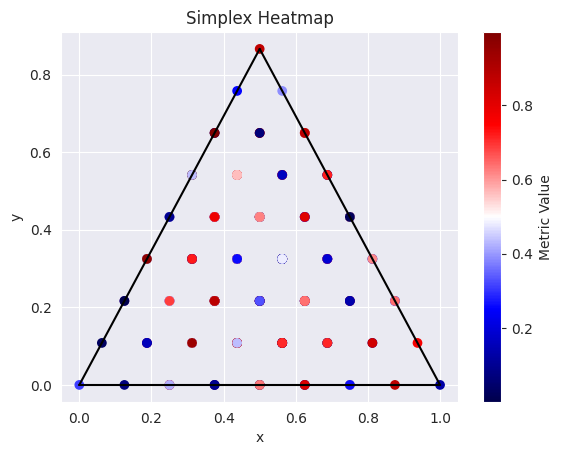

In [58]:
plot_simplex(np.random.rand(len(scalars)))